<a href="https://colab.research.google.com/github/SyrnikRebirth/DetectorsComparison/blob/main/Task_%E2%84%965.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-contrib-python==4.5.1.48
!pip install opencv-python==4.5.1.48

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time 
import copy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab.patches import cv2_imshow

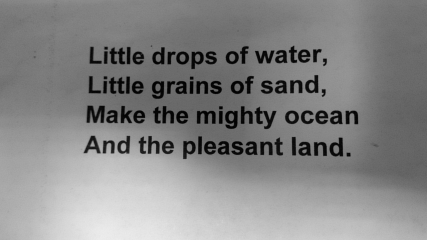

In [ ]:
imgs = list()
for i in range(1, 13):
    imgs.append(cv2.imread(f"/content/drive/MyDrive/task_5/{i:02d}.tif", 0))
cv2_imshow(imgs[-1])

In [ ]:
def get_all_unique_kps_and_des(keypoints, descriptors, distance_func='l2'):
    '''
    This function returns all unique keypoints and thier corresponding descriptors across every image
    '''
    if distance_func == 'hamming':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
    elif distance_func == 'l2':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)

    all_unique_keypoints = keypoints[0]
    all_unique_descriptors = descriptors[0]

    for kp, des in zip(keypoints[1:], descriptors[1:]):
        best_match = bf.match(des, all_unique_descriptors)

        list_of_queryIdx_with_matches = list()

        for m in best_match:
            list_of_queryIdx_with_matches.append(m.queryIdx)

        for i in range(len(des)):
            if i not in list_of_queryIdx_with_matches:
                all_unique_keypoints.append(kp[i])
                all_unique_descriptors = np.append(all_unique_descriptors, [des[i]], axis=0)

    return all_unique_keypoints, all_unique_descriptors

In [ ]:
def find_all_imgs_for_every_keypoint(keypoints, descriptors, all_unique_descriptors, distance_func='l2'):
    '''
    For every keypoint this function finds corresponding image where this keypoint can be detected
    '''
    if distance_func == 'hamming':
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
    elif distance_func == 'l2':
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck = True)

    imgs_with_keypoints = [list() for _ in range(len(all_unique_descriptors))]

    for i, (kp, des) in enumerate(zip(keypoints[:], descriptors[:])):
        best_match = bf.match(all_unique_descriptors, des)

        for m in best_match:
            imgs_with_keypoints[m.queryIdx].append(i)
    return imgs_with_keypoints

In [ ]:
def get_algo_repeatability_with_respect_to_imgs(imgs_with_keypoints):
    '''
    This function computes algo repeatability
    '''
    algo_repeatability_with_respect_to_imgs = list()
    for i in range(1, len(imgs) + 1):
      list_of_keypoints_repeatability = list()
      for imgs_indx in imgs_with_keypoints:
        img_count = 0
        for indx in range(i):
          if indx in imgs_indx:
            img_count += 1
        list_of_keypoints_repeatability.append(img_count / i)
      algo_repeatability = np.mean(list_of_keypoints_repeatability)
      algo_repeatability_with_respect_to_imgs.append(algo_repeatability)
    return algo_repeatability_with_respect_to_imgs

In [ ]:
shi_tomasi_keypoints = list()
shi_tomasi_descriptors = list()

detector_work_time = list()
for img in imgs:
    start_time = time.time()
    corners = cv2.goodFeaturesToTrack(img, maxCorners=100, qualityLevel=0.7, minDistance=10)
    keypoints = [cv2.KeyPoint(x=c[0][0], y=c[0][1], _size=20) for c in corners]
    detector_work_time.append((time.time() - start_time) / len(keypoints))
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.compute(img, keypoints)

    shi_tomasi_keypoints.append(keypoints)
    shi_tomasi_descriptors.append(descriptors)

print(f'Среднее время работы детектора: {np.mean(detector_work_time)}')

all_unique_keypoints, all_unique_descriptors = get_all_unique_kps_and_des(shi_tomasi_keypoints, shi_tomasi_descriptors)
imgs_with_keypoints = find_all_imgs_for_every_keypoint(shi_tomasi_keypoints, shi_tomasi_descriptors, all_unique_descriptors)
shi_tomasi_algo_repeatability_with_respect_to_imgs = get_algo_repeatability_with_respect_to_imgs(imgs_with_keypoints)

Среднее время работы детектора: 0.00011672919282341701


In [ ]:
SIFT_keypoints = list()
SIFT_descriptors = list()

detector_work_time = list()
for img in imgs:
    start_time = time.time()
    sift = cv2.SIFT_create()
    keypoints = sift.detect(img, None)
    detector_work_time.append((time.time() - start_time) / len(keypoints))
    keypoints, descriptors = sift.compute(img, keypoints)

    SIFT_keypoints.append(keypoints)
    SIFT_descriptors.append(descriptors)

print(f'Среднее время работы детектора: {np.mean(detector_work_time)}')

all_unique_keypoints, all_unique_descriptors = get_all_unique_kps_and_des(SIFT_keypoints, SIFT_descriptors)
imgs_with_keypoints = find_all_imgs_for_every_keypoint(SIFT_keypoints, SIFT_descriptors, all_unique_descriptors)
SIFT_algo_repeatability_with_respect_to_imgs = get_algo_repeatability_with_respect_to_imgs(imgs_with_keypoints)

Среднее время работы детектора: 6.828406298405025e-05


In [ ]:
BRISK_keypoints = list()
BRISK_descriptors = list()

detector_work_time = list()
for img in imgs:
    start_time = time.time()
    brisk = cv2.BRISK_create()
    keypoints = brisk.detect(img, None)
    detector_work_time.append((time.time() - start_time) / len(keypoints))
    keypoints, descriptors = brisk.compute(img, keypoints)

    BRISK_keypoints.append(keypoints)
    BRISK_descriptors.append(descriptors)

print(f'Среднее время работы детектора: {np.mean(detector_work_time)}')

all_unique_keypoints, all_unique_descriptors = get_all_unique_kps_and_des(BRISK_keypoints, BRISK_descriptors, distance_func='hamming')
imgs_with_keypoints = find_all_imgs_for_every_keypoint(BRISK_keypoints, BRISK_descriptors, all_unique_descriptors, distance_func='hamming')
BRISK_algo_repeatability_with_respect_to_imgs = get_algo_repeatability_with_respect_to_imgs(imgs_with_keypoints)

Среднее время работы детектора: 5.7293440011491546e-05


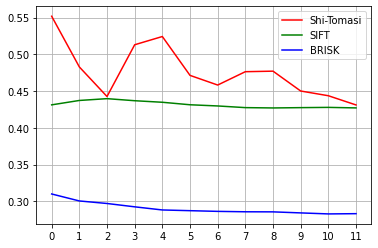

In [ ]:
plt.grid()
plt.plot(shi_tomasi_algo_repeatability_with_respect_to_imgs, color='red', label='Shi-Tomasi')
plt.plot(SIFT_algo_repeatability_with_respect_to_imgs, color='green', label='SIFT')
plt.plot(BRISK_algo_repeatability_with_respect_to_imgs, color='blue', label='BRISK')
plt.legend()
plt.xticks(np.arange(len(imgs)))

plt.show()

Вывод: Были протестированы три детектора(Shi-Tomasi, SIFT и BRISK)

Параметр repeatility лучше всех у детектора Shi-Tomasi. 

Значение средней скорости нахождения одной keypoint лучше у детектора BRISK 